# Chaos and Fractals

I recently read [Chaos - James Gleick](https://www.amazon.in/Chaos-James-Gleick/dp/0749386061/ref=sr_1_1?ie=UTF8&qid=1543228060&sr=8-1&keywords=chaos). 

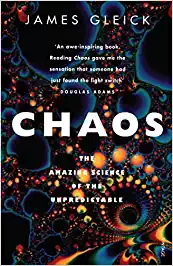

This post is about me trying to reproduce some of the stuff done there.


## Bifurcation

I recollect that the earliest bifurcation diagrams were made by a simple equation $x_{next} = r x (1 - x)$. Let's try to build that famous graph again.

In [1]:
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


/home/arjoonn/.local/share/virtualenvs/arjoonncom-9NVigc58/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


Text(0.5, 1.0, '10 trials each of 100 steps')

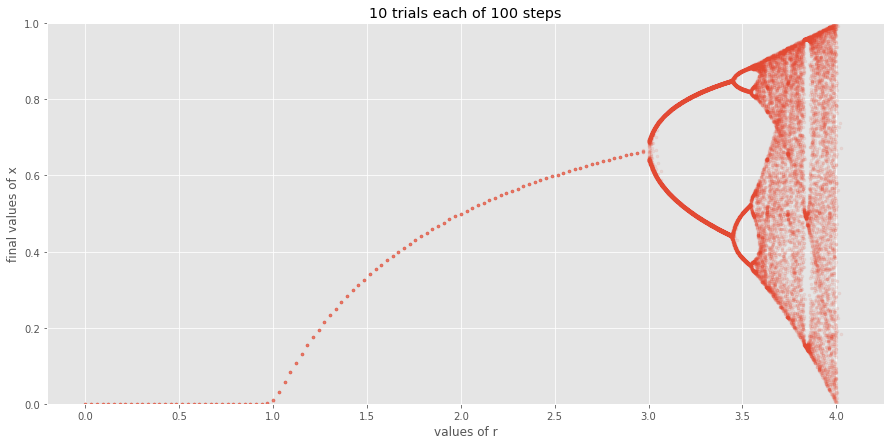

In [2]:
def equation(x, r):
    return r * x * (1-x)

n_trials = 10  # how many times should we randomly initialize x?
n_steps = 100  # how many time should the equation be applied to x?

r_range = list(np.linspace(0, 3, 100)) + list(np.linspace(3, 5, 5000))
values_of_r = []
final_values_of_x = []
for trial in range(n_trials):
    for r in r_range:
        x = random.random()
        for step in range(n_steps):
            x = equation(x, r)
        final_values_of_x.append(x)
        values_of_r.append(r)
        
plt.figure(figsize=(15, 7))
plt.scatter(values_of_r, final_values_of_x, marker='.', alpha=0.1)
plt.xlabel('values of r')
plt.ylabel('final values of x')
plt.ylim(0, 1)
plt.title(f'{n_trials} trials each of {n_steps} steps')

We can see the plot from the book quiet clearly. What a kick! Let's
see if we can't build sommething more complex from the book. What about the snowflake? Maybe if we did an interactive one it would be more fun no? If you want to download this notebook you can do so by using the link in your browser and changing the `posts` part to `ipynb`.

Try it out! It's fun to play with!

In [3]:
from ipywidgets import interact, IntSlider


def fn(r):
    x_values = []
    y_values = []
    for trial in range(100):
        x = random.random()
        for step in range(100):
            x_values.append(step)
            y_values.append(x)
            x = equation(x, r=r)
    plt.scatter(x_values, y_values, marker='.', alpha=0.3)
    plt.xlabel('iterations')
    plt.ylabel('values of x')
    plt.title(f'r = {r}')
    plt.ylim(0, 1.1)

interact(fn, r=(0, 6, 0.1))

interactive(children=(FloatSlider(value=3.0, description='r', max=6.0), Output()), _dom_classes=('widget-inter…

<function __main__.fn(r)>

# Mandelbrot set

Here comes the big daddy! The mandlebrot set! I've been wanting to generate this ever since I laid my eyes on that image! On page 231 there are a few instructions on how to generate these images. We'll follow those.

In [4]:
from functools import lru_cache
from multiprocessing import Pool


@lru_cache(maxsize=None)
def check_if_member(c):
    z = complex(0, 0)
    for _ in range(1000):
        z = z**2 + c
        if z.real > 2 or z.real < -2 or z.imag > 2 or z.imag < -2:
            return False
    return True

limit = 2.5
resolution = 1000
grid = [complex(i, j) for i in np.linspace(-limit, limit, resolution)
        for j in linspace(-limit, limit, resolution)]

print(f'{len(grid)} items to check')

with Pool() as pool:
    results = pool.map(check_if_member, grid)

1000000 items to check


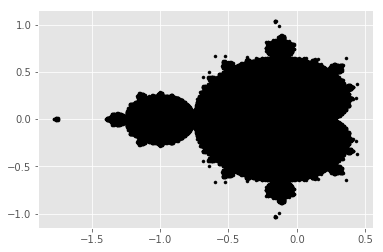

In [5]:
black_x, black_y = list(zip(*[(i.real, i.imag) for i, flag in zip(grid, results) if flag]))
plt.scatter(black_x, black_y, marker='.', color='black')

What if I limit to a smaller area? Let's write a function that calculates this set given boundary coordinates. We can use the previous interactive controls to do this.

In [6]:
import seaborn as sns
import colorsys
import pandas as pd
from ipywidgets import FloatSlider

def calculate(c):
    z = complex(0, 0)
    for step in range(1000):
        z = z**2 + c
        if z.real > 2 or z.real < -2 or z.imag > 2 or z.imag < -2:
            return False, step
    return True, step

def mandelbrot(left_x, right_x, top_y, bottom_y, resolution):
    left_x, right_x = min(left_x, right_x), max(left_x, right_x)
    top_y, bottom_y = max(top_y, bottom_y), min(top_y, bottom_y)
    grid = [complex(i, j) for i in np.linspace(left_x, right_x, resolution)
            for j in linspace(bottom_y, top_y, resolution)]
    with Pool() as pool:
        results = pool.map(calculate, grid)
    x, y, c = list(zip(*[
        (number.real, number.imag, step)
        for number, (is_member, step) in zip(grid, results)
        if is_member
    ]))
    m, M = min(c), max(c)
    d = M-m
    if d > 0:
        c = [colorsys.hsv_to_rgb((i-m)/d, 1, 1) for i in c]
    plt.figure(figsize=(15, 10))
    plt.scatter(x, y, c=c, marker='.')
    plt.grid(False)
interact(mandelbrot,
         left_x=FloatSlider(min=-2, max=2, step=0.01, value=-2),
         right_x=FloatSlider(min=-2, max=2, step=0.01, value=1.4),
         top_y=FloatSlider(min=-2, max=2, step=0.01, value=1.1),
         bottom_y=FloatSlider(min=-2, max=2, step=0.01, value=-1.1),
         resolution=IntSlider(min=10, max=10000, step=10, value=500)
        )

interactive(children=(FloatSlider(value=-2.0, description='left_x', max=2.0, min=-2.0, step=0.01), FloatSlider…

<function __main__.mandelbrot(left_x, right_x, top_y, bottom_y, resolution)>

We can begin to see the outlines of the colorings. There's more detail to be had in that plot! We'll get to the bottom of it! Try to explore the `seahorse valley` in the middle there!You can play around with the controls once you download the notebook!

That's what the book mentions! I also found an interesting thing on wikipedia. The [Buddhabrot!](https://en.wikipedia.org/wiki/Buddhabrot).
![buddhabrot image](https://upload.wikimedia.org/wikipedia/commons/9/9c/Buddhabrot_20000.png)